<a href="https://colab.research.google.com/github/GiuBonacchi/Music/blob/main/sistema_de_reconhecimento_musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv('dataframe_musicas.csv')

Visualização de dados




In [187]:
print(df.head()) # 5 primeiros

                music         artist  duration_ms  music_popularity  \
0                Hurt       NewJeans       177946                74   
1             Gravity     John Mayer       245826                76   
2  If I Ain't Got You    Alicia Keys       228706                85   
3                Love   Keyshia Cole       255333                85   
4                Home  Michael Bublé       225906                75   

                  genres  artist_popularity  followers  liked  
0              ['k-pop']                 80   10899590      1  
1  ['singer-songwriter']                 79    6181000      1  
2    ['r&b', 'neo soul']                 81   12650472      1  
3                ['r&b']                 73    4224826      1  
4          ['christmas']                 75    6873401      1  


In [188]:
print(df.shape) # linhas / colunas

(143, 8)


In [189]:
print(df.dtypes) # tipos

music                object
artist               object
duration_ms           int64
music_popularity      int64
genres               object
artist_popularity     int64
followers             int64
liked                 int64
dtype: object


In [190]:
print(df.isnull().sum()) # quantidade de nulos

music                0
artist               0
duration_ms          0
music_popularity     0
genres               0
artist_popularity    0
followers            0
liked                0
dtype: int64


In [191]:
print(df['liked'].value_counts()) # quantidade de likes

liked
0    91
1    52
Name: count, dtype: int64


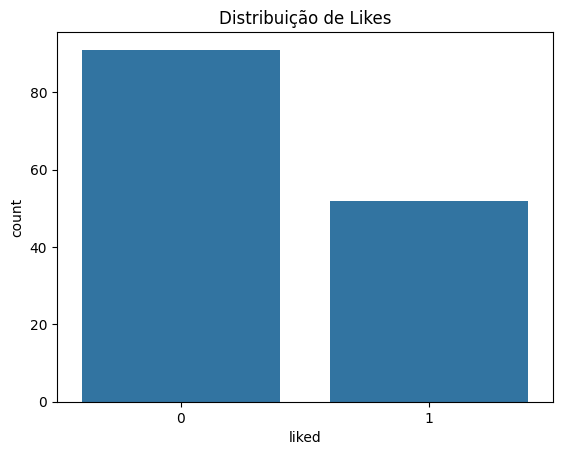

In [192]:
sns.countplot(x='liked', data=df)
plt.title('Distribuição de Likes')
plt.show()

In [193]:
print(df.describe())

         duration_ms  music_popularity  artist_popularity     followers  \
count     143.000000        143.000000         143.000000  1.430000e+02   
mean   243928.678322         49.678322          75.111888  1.236618e+07   
std     64242.253316         33.992667          10.023989  1.963722e+07   
min    121813.000000          0.000000          38.000000  4.414200e+04   
25%    202702.500000          3.500000          69.500000  3.011478e+06   
50%    233973.000000         69.000000          76.000000  5.869309e+06   
75%    269673.000000         78.000000          81.500000  1.268315e+07   
max    544925.000000         92.000000          93.000000  1.210001e+08   

            liked  
count  143.000000  
mean     0.363636  
std      0.482737  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


count: Mostra quantos valores existem em cada coluna.(143 musicas listadas)

mean: É a média dos valores.

std: É o desvio padrão, que nos diz o quanto os valores variam em relação à média.

min: É o menor valor encontrado na coluna.

25%: É o primeiro quartil, que mostra o valor abaixo do qual 25% dos dados estão.

50%: É a mediana, o valor central.

75%: É o terceiro quartil, que mostra o valor abaixo do qual 75% dos dados estão.

max: É o maior valor encontrado na coluna.

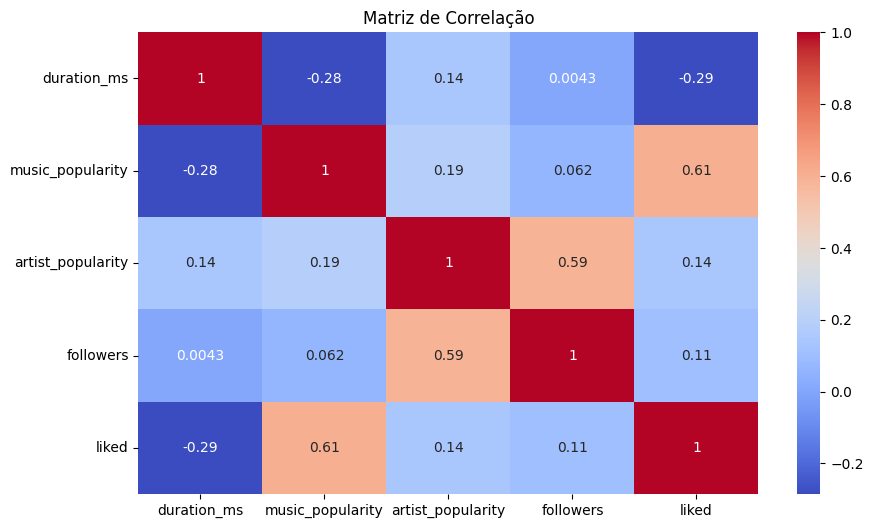

In [194]:
#mostra o quão importante é cada uma das colunas em relação
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot= True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [195]:
print(df['genres'].unique())

["['k-pop']" "['singer-songwriter']" "['r&b', 'neo soul']" "['r&b']"
 "['christmas']" "['britpop', 'madchester']" "['soft pop']"
 "['retro soul']" "['country']" "['acid jazz']" "['surf rock']"
 "['soft pop', 'acoustic pop']"
 "['modern blues', 'blues rock', 'blues', 'soul blues']" "['pop']"
 "['indie folk']" "['classic rock', 'yacht rock', 'soft rock']"
 "['soft pop', 'pop']" "['motown', 'classic soul', 'soul']"
 "['opm', 'pinoy indie', 'harana', 'p-pop', 'kundiman']" "['indie']"
 "['pop punk', 'emo']" "['bedroom pop']" "['disco']"
 "['new wave', 'synthpop']" "['reggae', 'mpb', 'roots reggae']"
 "['yacht rock']" "['classic rock', 'rock', 'glam rock']"
 "['garage rock', 'blues rock', 'rock', 'alternative rock']"
 "['nu metal', 'rap metal', 'rock', 'alternative metal']"
 "['punk', 'hardcore punk']"
 "['rock', 'post-grunge', 'alternative rock', 'grunge']"
 "['punk', 'skate punk']"
 "['rock', 'glam metal', 'hard rock', 'classic rock']"
 "['classic rock', 'acid rock']" "['southern gothic']"

In [196]:
df = df.drop_duplicates().fillna(0) #remove duplas e preenche valores nulos

In [197]:
df = df.drop_duplicates(
    subset=['music', 'artist', 'duration_ms', 'music_popularity', 'genres', 'artist_popularity', 'followers', 'liked'],
    keep='first'
).reset_index(drop=True)

In [198]:
dummies = df['genres'].str.get_dummies(sep=',') #cria dummies pros gêneros
df = pd.concat([df.drop(columns=['genres']), dummies], axis=1)


XXX


In [199]:
x = df.drop(columns=['liked', 'music', 'artist'], axis=1) #remove as colunas que não serão usadas
y = df['liked'] #separando o alvo

In [200]:
colunas_usadas_no_treino = x.columns.tolist()
print(colunas_usadas_no_treino) #armazenar as colunas na variavel para ajudar na hora de utilizar

['duration_ms', 'music_popularity', 'artist_popularity', 'followers', " 'acid rock']", " 'acoustic pop']", " 'alternative metal'", " 'alternative metal']", " 'alternative rock'", " 'alternative rock']", " 'aor']", " 'blues rock'", " 'blues'", " 'christian rock'", " 'classic rock'", " 'classic rock']", " 'classic soul'", " 'emo']", " 'glam metal'", " 'glam rock']", " 'gothic rock'", " 'grunge']", " 'harana'", " 'hard rock'", " 'hard rock']", " 'hardcore punk'", " 'hardcore punk']", " 'kundiman']", " 'madchester']", " 'metal']", " 'mpb'", " 'neo soul']", " 'nu metal']", " 'p-pop'", " 'pinoy indie'", " 'pop punk'", " 'pop punk']", " 'pop']", " 'post-grunge'", " 'post-hardcore'", " 'progressive rock'", " 'punk'", " 'punk']", " 'rap metal'", " 'rap rock'", " 'rap rock']", " 'rock and roll']", " 'rock'", " 'rock']", " 'roots reggae']", " 'screamo'", " 'skate punk']", " 'soft rock']", " 'soul blues']", " 'soul']", " 'southern gothic'", " 'symphonic metal'", " 'synthpop']", " 'traditional coun

In [201]:
numeric_cols = ['duration_ms', 'music_popularity', 'artist_popularity', 'followers']
scaler = StandardScaler()
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])
#pega as colunas númericas e padroniza elas

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [203]:
print("Formato de X:", x.shape)
print("Formato de y:", y.shape)
print("Colunas de X:", x.columns.tolist())
print("Valores únicos em y:", y.unique())

Formato de X: (142, 105)
Formato de y: (142,)
Colunas de X: ['duration_ms', 'music_popularity', 'artist_popularity', 'followers', " 'acid rock']", " 'acoustic pop']", " 'alternative metal'", " 'alternative metal']", " 'alternative rock'", " 'alternative rock']", " 'aor']", " 'blues rock'", " 'blues'", " 'christian rock'", " 'classic rock'", " 'classic rock']", " 'classic soul'", " 'emo']", " 'glam metal'", " 'glam rock']", " 'gothic rock'", " 'grunge']", " 'harana'", " 'hard rock'", " 'hard rock']", " 'hardcore punk'", " 'hardcore punk']", " 'kundiman']", " 'madchester']", " 'metal']", " 'mpb'", " 'neo soul']", " 'nu metal']", " 'p-pop'", " 'pinoy indie'", " 'pop punk'", " 'pop punk']", " 'pop']", " 'post-grunge'", " 'post-hardcore'", " 'progressive rock'", " 'punk'", " 'punk']", " 'rap metal'", " 'rap rock'", " 'rap rock']", " 'rock and roll']", " 'rock'", " 'rock']", " 'roots reggae']", " 'screamo'", " 'skate punk']", " 'soft rock']", " 'soul blues']", " 'soul']", " 'southern gothic'

In [204]:
x[['duration_ms', 'music_popularity', 'artist_popularity', 'followers']].describe()

,duration_ms,music_popularity,artist_popularity,followers
count,1.420000e+02,142.000000,1.420000e+02,1.420000e+02
mean,2.501911e-17,0.000000,-3.627771e-16,-5.003822e-17
std,1.003540e+00,1.003540,1.003540e+00,1.003540e+00
min,-1.903369e+00,-1.459070,-3.702388e+00,-6.296281e-01
25%,-6.697050e-01,-1.363273,-5.848648e-01,-4.796166e-01
50%,-1.467139e-01,0.560047,1.384005e-01,-3.372727e-01
75%,4.012094e-01,0.840071,6.621443e-01,1.417538e-02
max,4.684664e+00,1.252737,1.784453e+00,5.531604e+00


In [205]:
print("Valores nulos em X:\n", x.isnull().sum())
print("Valores nulos em y:", y.isnull().sum())

Valores nulos em X:
 duration_ms            0
music_popularity       0
artist_popularity      0
followers              0
 'acid rock']          0
                      ..
['southern gothic']    0
['southern rock'       0
['stoner rock'         0
['surf rock']          0
['yacht rock']         0
Length: 105, dtype: int64
Valores nulos em y: 0


In [206]:
print("Tamanho do conjunto de treino:", x_train.shape)
print("Tamanho do conjunto de teste:", x_test.shape)

Tamanho do conjunto de treino: (113, 105)
Tamanho do conjunto de teste: (29, 105)


In [207]:
x.head()

,duration_ms,music_popularity,artist_popularity,followers,'acid rock'],'acoustic pop'],'alternative metal','alternative metal'],'alternative rock','alternative rock'],...,['rock',['singer-songwriter'],['skate punk',['soft pop',['soft pop'],['southern gothic'],['southern rock',['stoner rock',['surf rock'],['yacht rock']
0,-1.029355,0.722166,0.487563,-0.076675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.027566,0.781118,0.387802,-0.317030,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.239000,1.046404,0.587324,0.012511,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.175594,1.046404,-0.210762,-0.416673,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.282597,0.751642,-0.011241,-0.281761,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [209]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [210]:
y_pred = rf.predict(x_test)

In [211]:
print("Acurácia no treino", rf.score(x_train, y_train))
accuracy = accuracy_score(y_test, y_pred) #compara os valores reais com os previstos
print(f"Acurácia do modelo:, {accuracy:.2f}")

Acurácia no treino 1.0
Acurácia do modelo:, 0.97


In [212]:
print("\nRelatorio de Classificação:")
print(classification_report(y_test, y_pred))


Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.89      0.94         9

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



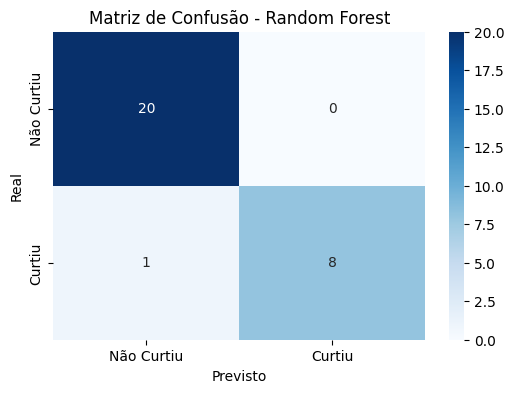

In [213]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Curtiu', 'Curtiu'],
            yticklabels=['Não Curtiu', 'Curtiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

(0,0) = 20 → acertou 20 vezes ao prever a classe 0 corretamente.

(0,1) = 0 →  não cometeu erros ao prever 1 quando o valor real era 0.

(1,0) = 1 → errou 1 vez, prevendo 0 quando o valor real era 1.

(1,1) = 8 → acertou 8 vezes ao prever a classe 1 corretamente.




In [214]:
importances = rf.feature_importances_ #serve pra dizer as caracteristicas mais importantes
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

In [215]:
print("Variáveis mais importantes:")
print(feature_importance_df.head(10))

Variáveis mais importantes:
                  feature  importance
1        music_popularity    0.280779
0             duration_ms    0.090070
3               followers    0.059537
2       artist_popularity    0.049349
48                'rock']    0.043769
82            ['nu metal'    0.033518
8      'alternative rock'    0.031696
87         ['post-grunge'    0.031072
7    'alternative metal']    0.030184
6     'alternative metal'    0.021900


Salvar

In [216]:
import pickle

In [217]:
with open ('modelo_random_forest.pkl', 'wb') as file:
    pickle.dump(rf, file)
from google.colab import files
files.download('modelo_random_forest.pkl')

In [218]:
with open ('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
from google.colab import files
files.download('scaler.pkl')

In [219]:
with open ('colunas_usadas_no_treino.pkl', 'wb') as file:
    pickle.dump(colunas_usadas_no_treino, file)
from google.colab import files
files.download('colunas_usadas_no_treino.pkl')